### Importing libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Define path

path = r'C:\Users\fiyin\OneDrive\Documents\InstaCart Basket Analysis'

In [4]:
# Import data

ords_prods_cust = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared data', 'instacart_combined.pkl'))

In [4]:
ords_prods_cust.shape

(32399732, 31)

In [5]:
ords_prods_cust.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


### 2. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [5]:
# Change data type from float to int

ords_prods_cust['order_day_of_week'] = ords_prods_cust['order_day_of_week'].astype('int8')

Text(0, 0.5, 'Number of orders')

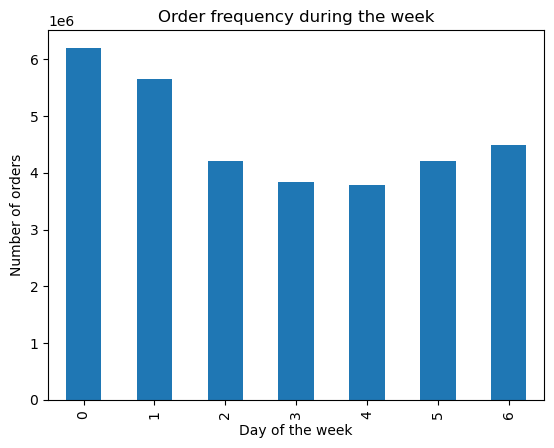

In [6]:
# Bar chart, sorted according to index value

order_week_bar = ords_prods_cust['order_day_of_week'].value_counts().sort_index().plot.bar()

plt.title('Order frequency during the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')

Text(0.5, 1.0, 'Most common product prices')

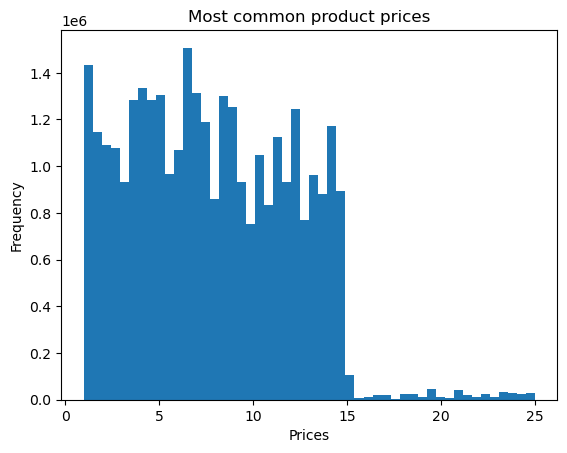

In [21]:
# Create histogram

hist_prices = ords_prods_cust['prices'].plot.hist(bins = 50)

plt.xlabel('Prices')
plt.title('Most common product prices')


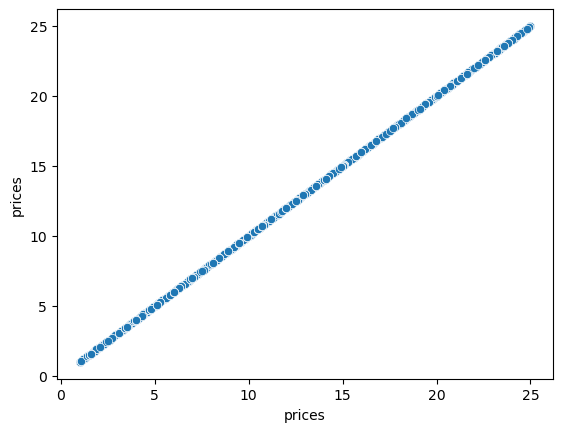

In [37]:
prices_scatter = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)

#### Sampling data

In [11]:
# Set seed for random number generator

np.random.seed(4)

In [12]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [13]:
dev

array([False,  True, False, ..., False,  True,  True])

In [14]:
# Store 70% of the sample in the dataframe big

big = ords_prods_cust[dev]

In [15]:
# Store 30% of the sample in the dataframe small

small = ords_prods_cust[~dev]

In [16]:
len(ords_prods_cust)

32399732

In [17]:
len(big) + len(small)

32399732

In [18]:
# Create dataframe using only the two relevant columns

df_2 = small[['order_day_of_week','prices']]

Text(0.5, 1.0, 'Total amount spent through the week')

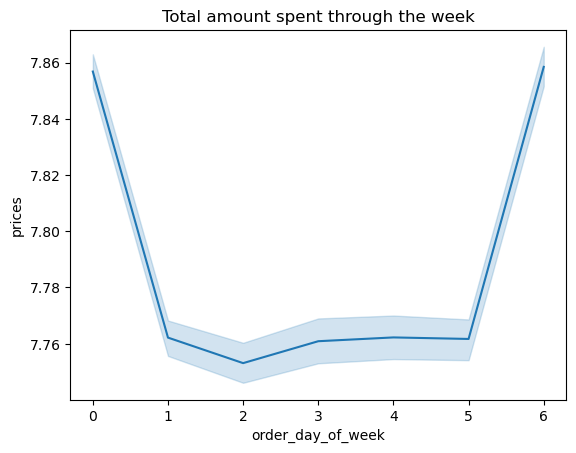

In [19]:
# Create line chart of 'order_day_of_week' and 'prices'

week_prices_line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')
plt.title('Total amount spent through the week')

### 3. Create a histogram of the “order_hour_of_day” column.

Text(0.5, 1.0, 'Frequency of orders during the day')

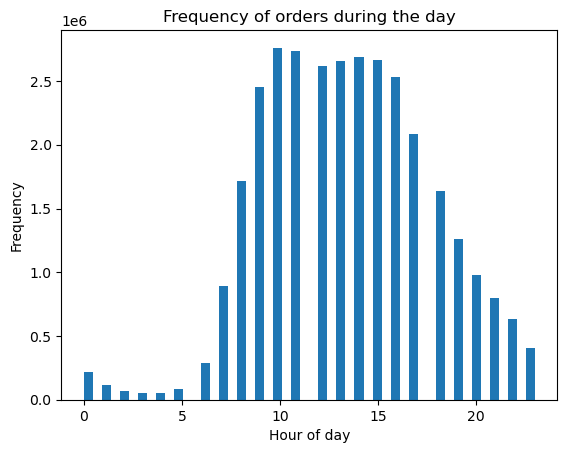

In [24]:
day_hour_hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 50)
plt.xlabel('Hour of day')
plt.title('Frequency of orders during the day')

#### The histogram shows the frequency of orders placed throughout the day (by hours). Most orders are placed between 10am and 3pm.

### 4. Create a bar chart from the “loyalty_flag” column.

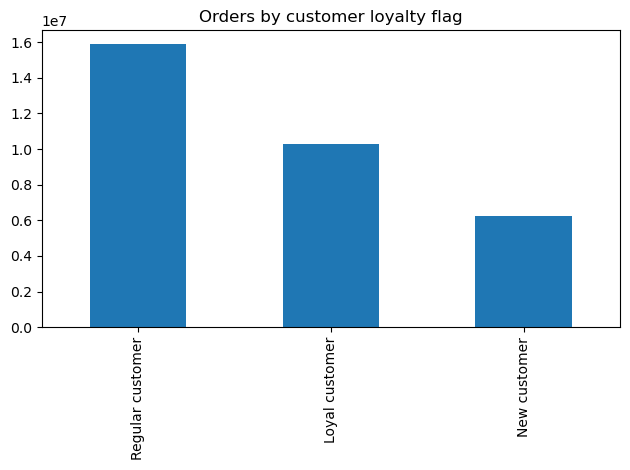

In [21]:
loyalty_bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()
plt.title('Orders by customer loyalty flag')
plt.tight_layout()

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [25]:
# Using 'small' data sample created earlier

hour_prices = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Relationship between prices and time of day')

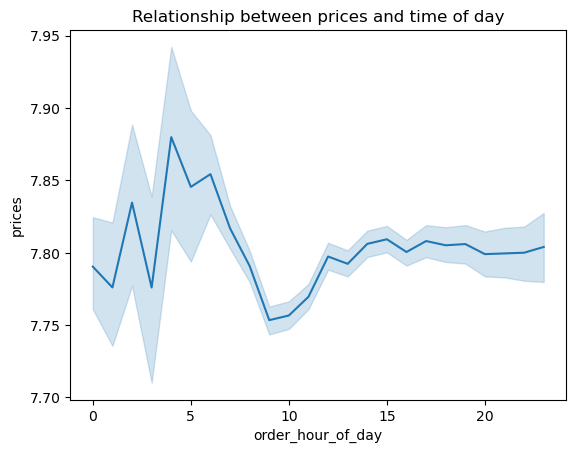

In [26]:
# Create line chart of 'order_hour_of_day' and 'prices'

day_hour_prices_line = sns.lineplot(data = hour_prices, x = 'order_hour_of_day', y = 'prices')

plt.title('Relationship between prices and time of day')

### 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [28]:
# *Using 'small' data sample created earlier

age_dep = small[['age','no_of_dependants']]

Text(0.5, 1.0, 'Relationship between age and number of dependents')

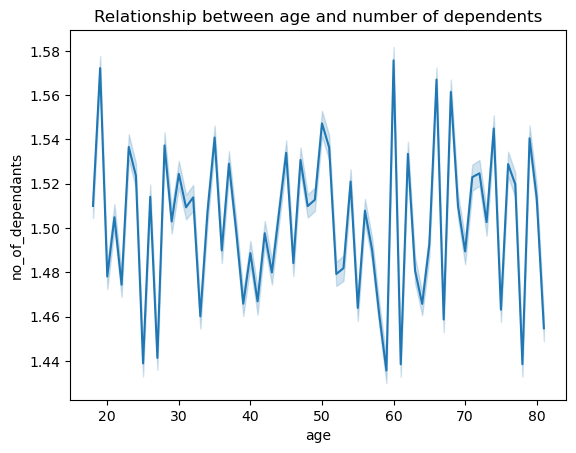

In [29]:
# Create line chart of 'age' and 'no_of_dependants'

line_age_dep = sns.lineplot(data = age_dep, x = 'age', y = 'no_of_dependants')
plt.title('Relationship between age and number of dependents')

### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot 

Text(0.5, 1.0, 'Relationship between age and income')

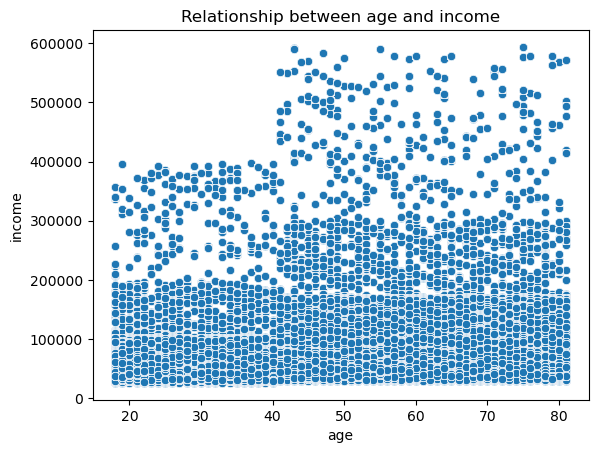

In [30]:
# Scatterplot of age and income

scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust)
plt.title('Relationship between age and income')

#### The scatterplot shows the relationship between age and income. Most customers earn up to 200,000. The highest earning customers are 40 years and older.

### 8. Export your visualizations as “.png” files in your relevant project folder.

In [7]:
order_week_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_order_dow.png'))

In [32]:
hist_prices.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'prices_histogram.png'))

In [45]:
prices_scatter.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'prices_scatterplot.png'))

In [33]:
week_prices_line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_dow_prices.png'))

In [34]:
day_hour_hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hod_histogram.png'))

In [22]:
loyalty_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_bar.png'))

In [36]:
day_hour_prices_line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_hod_prices.png'))

In [37]:
line_age_dep.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_age_dependants.png'))

In [38]:
scatter_age_income.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_income_scatter.png'))